In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro

In [3]:
path = '/Users/xueyining/Downloads/ab_testing.csv'
df = pd.read_csv(path)

In [5]:
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [7]:
df.nunique()

User ID       5000
Group            2
Page Views      14
Time Spent     410
Conversion       2
Device           2
Location         4
dtype: int64

In [9]:
df.describe()

,User ID,Page Views,Time Spent
count,5000.000000,5000.000000,5000.000000
mean,14925.159000,7.537600,242.512600
std,2869.153773,4.022465,118.254153
min,10001.000000,1.000000,40.000000
25%,12456.250000,4.000000,137.000000
50%,14858.500000,8.000000,243.000000
75%,17379.750000,11.000000,346.000000
max,19995.000000,14.000000,449.000000


In [13]:
# Check the distribution of unique groups for each user
double_variant_count = df.groupby('User ID')['Group'].nunique().value_counts()
double_variant_count

1    5000
Name: Group, dtype: int64

In [19]:
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,0,Mobile,Northern Ireland
1,11682,A,9,342,0,Mobile,Scotland
2,19825,A,2,396,0,Desktop,Northern Ireland
3,16080,B,4,318,0,Desktop,Wales
4,18851,A,1,338,1,Desktop,Scotland


In [21]:
group_summary = df.groupby('Group').agg({
    'Page Views': 'mean',
    'Time Spent': 'mean',
    'Conversion': 'mean'
}).reset_index() 
group_summary

,Group,Page Views,Time Spent,Conversion
0,A,7.581580,241.733227,0.053990
1,B,7.492946,243.303910,0.140669


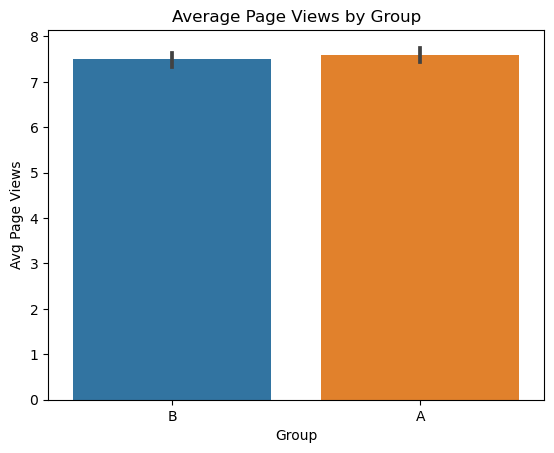

In [23]:
sns.barplot(x='Group', y='Page Views', data=df)
plt.title('Average Page Views by Group')
plt.ylabel('Avg Page Views')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

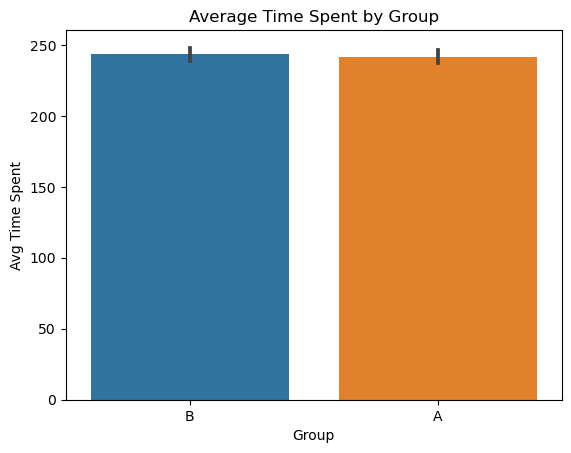

In [29]:
sns.barplot(x="Group", y="Time Spent", data = df) 
plt.title("Average Time Spent by Group")
plt.ylabel("Avg Time Spent")
plt.show

In [15]:
df['Conversion'] = df['Conversion'].map({'Yes': 1, 'No': 0})

<function matplotlib.pyplot.show(close=None, block=None)>

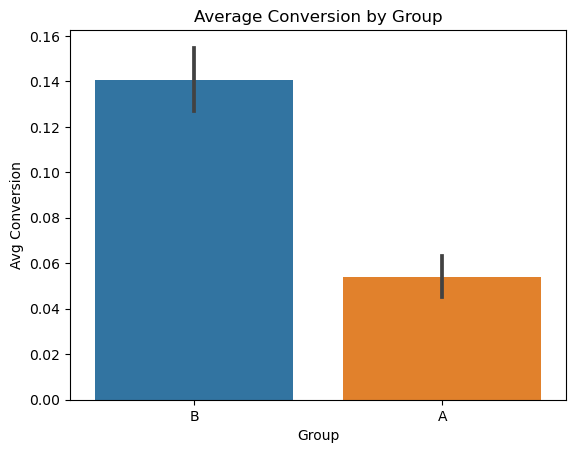

In [31]:
sns.barplot(x="Group", y="Conversion", data = df) 
plt.title("Average Conversion Rate by Group")
plt.ylabel("Avg Conversion Rate")
plt.show

<Axes: xlabel='Group', ylabel='Page Views'>

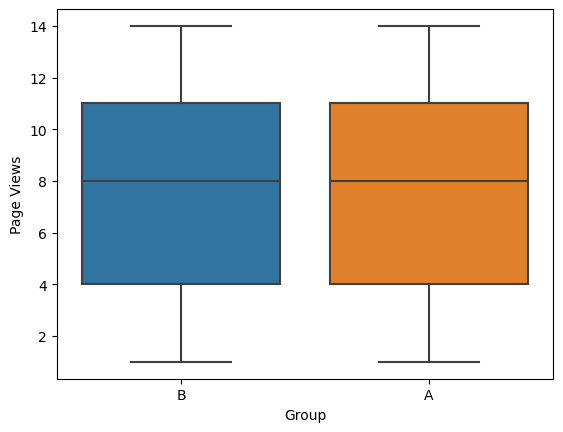

In [33]:
sns.boxplot(x='Group', y='Page Views', data=df)

In [37]:
from scipy.stats import ttest_ind

In [ ]:
# Null hypothesis (H0): The mean of page views is the same between Group A and Group B.
# Alternative hypothesis (H1): The mean of page views is significantly different between Group A and Group B.

# We proceed with an independent samples t-test.
# If the p-value is less than 0.05, we reject the null hypothesis.
# This would indicate a statistically significant difference in page views between Group A and Group B.

In [39]:
# Extract page views information to two separate variables 
A_views = df[df['Group'] == 'A']['Page Views']
B_views = df[df['Group'] == 'B']['Page Views']

In [41]:
# Proformed Welch's t-test 
t_stat, p_val = ttest_ind(A_views, B_views, equal_var=False)

In [43]:
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 0.7792
P-value: 0.4359


In [ ]:
# P-value is larger than 0.05, therefore we do not have enough evidence to reject the null hypothesis
# The results indicate there is no significant  difference in page reviews between Group A and Group B. 

In [ ]:
# We do the same process on "Time Spent".

In [45]:
A_time = df[df['Group'] == 'A']['Time Spent']
B_time = df[df['Group'] == 'B']['Time Spent']

In [47]:
t_stat, p_val = ttest_ind(A_time, B_time, equal_var=False)

In [49]:
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: -0.4695
P-value: 0.6387


In [ ]:
#Conclusion: There is no statistically significant difference in time spent between Group A (white background) and Group B (black background).

In [ ]:
# The key difference is in the type of variable:
# "Page Views" and "Time Spent" are continuous variables, so an independent t-test is appropriate.
# "Conversion" is a binary variable (Yes/No), so an independent z-test for proportions is appropriate.

In [111]:
conversion_counts = df.groupby('Group')['Conversion'].agg(['sum', 'count'])
print(conversion_counts)

       sum  count
Group            
A      136   2519
B      349   2481


In [113]:
# Count is the total number of users in Group A and B
# Sum is the conversion count of each group

# In this table, Group A has a total of 2519 users, and 136 of them has converted. 
# Group B has a total of 2481 users, and 349 of them has converted.

In [115]:
from statsmodels.stats.proportion import proportions_ztest

In [117]:
successes = conversion_counts['sum'].values
total_number = conversion_counts['count'].values

In [119]:
z_stat, p_val = proportions_ztest(count=successes, nobs=total_number)

In [121]:
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.2e}")

Z-statistic: -10.3545
P-value: 3.99e-25


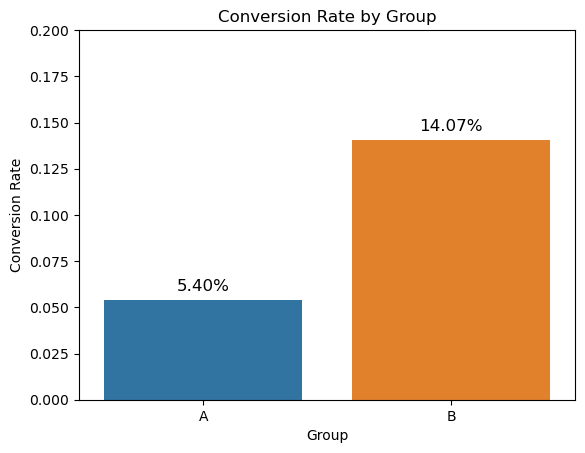

In [66]:
import matplotlib.pyplot as plt

conversion_rate = df.groupby('Group')['Conversion'].mean().reset_index()

sns.barplot(x='Group', y='Conversion', data=conversion_rate)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.2)

for i, row in conversion_rate.iterrows():
    plt.text(i, row['Conversion'] + 0.005, f"{row['Conversion']:.2%}", ha='center', fontsize=12)
plt.show()   

In [ ]:
# Conclusion: there is a significant difference in conversion rate between Group A and Group B. A darker background has a significant 
# higher conversion rate than a white background.

In [ ]:
# Now we look at other variables: Device and Location.
# First, we want to explore whether different devices affect the conversion rate.
# Specifically, we want to compare whether there is a significant difference in conversion rates
# between Desktop users and Mobile users.

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a contingency table of device and group 
device_table = pd.crosstab(df["Device"], df["Group"])
print(device_table)

Group       A     B
Device             
Desktop  1244  1294
Mobile   1275  1187


In [91]:
# Check if each user has a unique device 
device_per_user = df.groupby("User ID")["Device"].nunique()
all_unique_device = (device_per_user == 1).all()
all_unique_device 

True

In [95]:
# Proformed z test 
device_conversion = df.groupby('Device')['Conversion'].agg(['sum', 'count'])
print(device_conversion)

from statsmodels.stats.proportion import proportions_ztest
successes = device_conversion['sum'].values
totals = device_conversion['count'].values
z_stat, p_val = proportions_ztest(count=successes, nobs=totals)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

         sum  count
Device             
Desktop  253   2538
Mobile   232   2462
Z-statistic: 0.6513
P-value: 0.5149


In [ ]:
# p is greater than 0.05, there is no enough evidence to reject null hypothesis
# There is no significant digfference in conversion rate between desktop and mobile users 

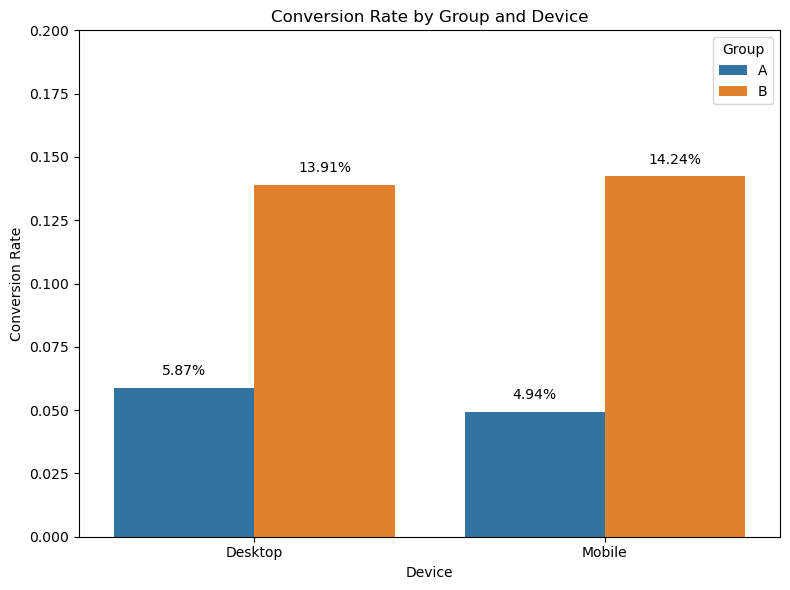

In [97]:
conv_by_device = df.groupby(['Group', 'Device'])['Conversion'].mean().reset_index()

# create barplot 
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Device', y='Conversion', hue='Group', data=conv_by_device)
plt.title('Conversion Rate by Group and Device')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.2)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 0.005,
        s=f'{height:.2%}',
        ha='center',
        fontsize=10
    )

plt.legend(title='Group')
plt.tight_layout()
plt.show()

In [ ]:
# First, we want to explore whether different locations affect the conversion rate.
# Specifically, we want to compare whether there is a significant difference in conversion rates
# between users located in different location.

In [101]:
# check if all users have a unique location 
location_per_user = df.groupby("User ID")["Location"].nunique()
all_unique_location = ( location_per_user == 1).all()
all_unique_location

True

In [107]:
# Conduct Chi-Square test (Why?)
# Because the z-test is only applicable when comparing two independent groups.
# Since we are comparing conversion rates across more than two locations,
# the Chi-Square test for independence is more appropriate.

from scipy.stats import chi2_contingency

# Create a contingency table of Location and Conversion
location_table = pd.crosstab(df['Location'], df['Conversion'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(location_table)

print("Chi-square statistic:", round(chi2, 4))
print("P-value:", round(p, 4))

Chi-square statistic: 4.9349
P-value: 0.1766


In [ ]:
# The p-value is greater than 0.05.
# Therefore, we fail to reject the null hypothesis.
# This indicates that there is no statistically significant difference in conversion rates among different locations.

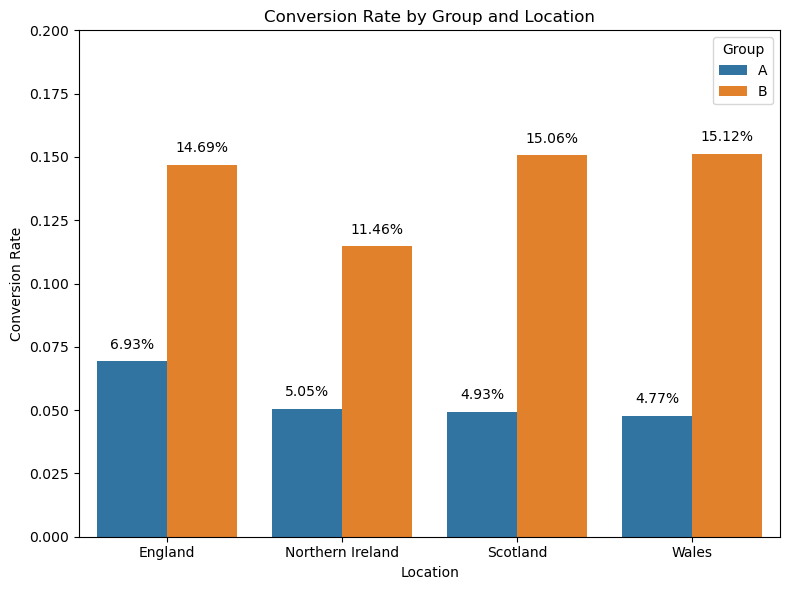

In [109]:
conv_by_loc = df.groupby(['Group', 'Location'])['Conversion'].mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Location', y='Conversion', hue='Group', data=conv_by_loc)
plt.title('Conversion Rate by Group and Location')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.2)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 0.005,
        s=f'{height:.2%}',
        ha='center',
        fontsize=10
    )

plt.legend(title='Group')
plt.tight_layout()
plt.show()